In [8]:
import os
import numpy as np
import csv
import matplotlib.pyplot as plt

from tslearn.utils import to_time_series_dataset
from tslearn.neighbors import KNeighborsTimeSeriesClassifier

In [9]:
def series_append(series, list, keys):
    for i in range(64):
        series[keys[i]].append(float(list[i]))
    return series

def load_series(filename):
    with open(filename, 'r') as csv_in:
        csv_file = list(csv.reader(csv_in))
        series = {}
        keys = csv_file[0]
        for key in keys: series[key] = []
        for i in range(2, len(csv_file), 2):
            series = series_append(series, csv_file[i], keys)
        return [series, int((len(csv_file) - 2) / 2)]

def unroll(series):
    l = []
    for key in series:
        if (key[-1] == 'v' or key[-1] == 'z'): continue
        l += (series[key])
    return l

In [29]:
# loading data

X_train_list = []
y_train_list = []

X_test_list = []
y_test_list = []

with open("..\\test_examples.txt") as t:
    test_examples = t.readlines()

for example in test_examples:
    series, num_frames = load_series("..\\time_series\\Time_normalized_stages\\4_final\\" + example[:-1])
    x_example = unroll(series)
    y_example = [float(example[4]), float(example[7]), float(example[10]), float(example[13]), float(example[16])]
    X_test_list.append(x_example)
    y_test_list.append(y_example)

with open("..\\training_examples.txt") as t:
    training_examples = t.readlines()

for example in training_examples:
    series, num_frames = load_series("..\\time_series\\Time_normalized_stages\\4_final\\" + example[:-1])
    x_example = unroll(series)
    y_example = [float(example[4]), float(example[7]), float(example[10]), float(example[13]), float(example[16])]
    X_train_list.append(x_example)
    y_train_list.append(y_example)

X_train = to_time_series_dataset(X_train_list)
X_test = to_time_series_dataset(X_test_list)

train_labels = [int(x[4]) for x in y_train_list]
test_labels = [int(x[4]) for x in y_test_list]

In [30]:
knn = KNeighborsTimeSeriesClassifier(n_neighbors=6)
knn.fit(X_train, train_labels)
print('starting fitting...')

result = knn.predict(X_test)

print(result)

starting fitting...
[2 0 0 0 1 0 6 0 0 0 0 6 0 1 0 0 0 2 0 6 5 6 0 6 0 0 0 0 2 0 2 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 7 2 0 0 0 0 5 0 0 0 1 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 7 0 0 0 0 0 0 0 0 1 1 0 0]


(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

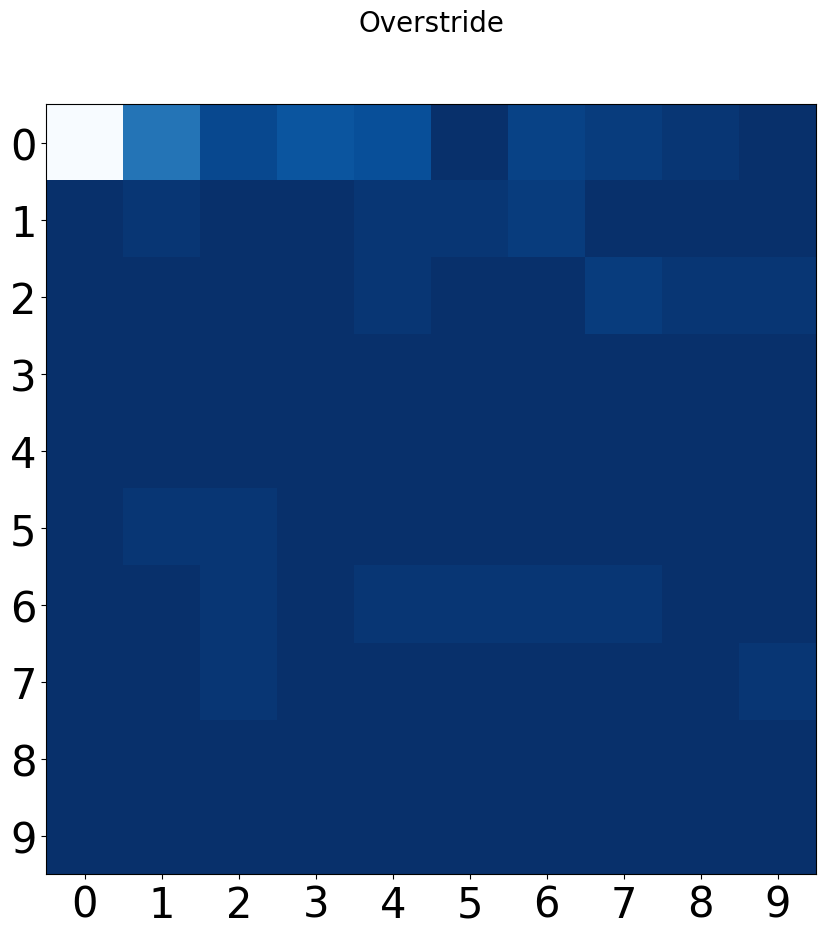

In [31]:
# confusion matrix generation

y = test_labels

o_conf = np.zeros((10, 10))

o_conf += 100

feature_index = 0

for i in range(len(result)):
    pred = result[i]
    truth = y[i]
    o_conf[pred][truth] -= 1
    # print(str(pred) + ' ' + str(truth))

fig, ax = plt.subplots(1, figsize=(10, 10))

ax.imshow(o_conf, cmap='Blues')
ax.set_title('Overstride\n\n', fontsize=20)
#ax.set_xlabel('\nLabel')
#ax.set_ylabel('Prediction\n')
ax.set_yticks(np.arange(0, 10))
ax.set_xticks(np.arange(0, 10))
plt.xticks(fontsize=30)
plt.yticks(fontsize=30)